# *Data Visualization and Statistics*

Gallery of Matplotlib examples: [https://matplotlib.org/gallery.html](https://matplotlib.org/gallery.html)

In [ ]:
## Run this cell to install the packages you'll need below.

!pip install textblob
!pip install numpy
!pip install scipy
!pip install pandas
!pip install matplotlib
!pip install pprint

In [1]:
## Now let's import those packages.

import os
from pprint import pprint
from textblob import TextBlob

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# The line above tells Jupyter to display Matplotlib graphics within the notebook.

In [ ]:
## Download sample text corpora from GitHub, then unzip.

os.chdir('/sharedfolder/')

!wget -N https://github.com/pcda18/pcda18.github.io/blob/master/week/8/Sample_corpora.zip?raw=true -O Sample_corpora.zip
!unzip -o Sample_corpora.zip

In [2]:
## Changing our current working directory to '/sharedfolder/Sample_corpora/' and viewing the files inside

os.chdir('/sharedfolder/Sample_corpora/')

os.listdir('./')

# Each filename in the list is a directory, each of which contains several plaintext files.

['Australian_Broadcasting_Commission_2006',
 'George_Eliot',
 'Herman_Melville',
 'Inaugural_Speeches',
 'Jane_Austen',
 'Joseph_Conrad']

In [3]:
!ls Jane_Austen

Emma.txt	    Northanger_Abbey.txt  Pride_and_Prejudice.txt
Mansfield_Park.txt  Persuasion.txt	  Sense_and_Sensibility.txt


In [4]:
!ls Herman_Melville

Bartleby_The_Scrivener.txt		  Omoo_Adventures_in_the_South_Seas.txt
Battle-Pieces_and_Aspects_of_the_War.txt  Pierre_or_the_Ambiguities.txt
Billy_Budd.txt				  Redburn_His_First_Voyage.txt
Israel_Potter.txt			  The_Confidence-Man.txt
Mardi_vol_1.txt				  Typee.txt
Mardi_vol_2.txt				  White_Jacket.txt
Moby_Dick.txt


In [5]:
## Loading a Melville novel as a TextBlob object

melville_path = 'Herman_Melville/Moby_Dick.txt' # a relative path pointing to a text file

melville_text = open(melville_path).read()  # reading plaintext file and assigning it to 
                                            # the variable `melville_text`

melville_text = melville_text.replace('\n', ' ')  # replacing newline ('\n') characters
                                                  # with spaces, for the sake of neatness

melville_blob = TextBlob(melville_text)  # converting the text string `melville_text` 
                                         # into a TextBlob object

In [6]:
## Loading an Austen novel as a TextBlob object

austen_path = 'Jane_Austen/Pride_and_Prejudice.txt'

austen_blob = TextBlob(open(austen_path).read().replace('\n', ' '))  # all the steps above in one line

In [7]:
## Recall that 'some_textblob_object.words' is a WordList object ...

melville_blob.words[5100:5140]

WordList(['brigs', 'schooners', 'and', 'what', 'not', 'And', 'as', 'for', 'going', 'as', 'cook', '—though', 'I', 'confess', 'there', 'is', 'considerable', 'glory', 'in', 'that', 'a', 'cook', 'being', 'a', 'sort', 'of', 'officer', 'on', 'ship-board—yet', 'somehow', 'I', 'never', 'fancied', 'broiling', 'fowls', '—though', 'once', 'broiled', 'judiciously', 'buttered'])

In [8]:
# ... which we can cast to an ordinary list.

list(melville_blob.words[5100:5140])

['brigs',
 'schooners',
 'and',
 'what',
 'not',
 'And',
 'as',
 'for',
 'going',
 'as',
 'cook',
 '—though',
 'I',
 'confess',
 'there',
 'is',
 'considerable',
 'glory',
 'in',
 'that',
 'a',
 'cook',
 'being',
 'a',
 'sort',
 'of',
 'officer',
 'on',
 'ship-board—yet',
 'somehow',
 'I',
 'never',
 'fancied',
 'broiling',
 'fowls',
 '—though',
 'once',
 'broiled',
 'judiciously',
 'buttered']

In [9]:
## And 'some_textblob_object.sentences' is a list of Sentence objects ...

austen_blob.sentences[100:105]

[Sentence(""Do you consider the forms of introduction, and the stress that is laid on them, as nonsense?"),
 Sentence("I cannot quite agree with you _there_."),
 Sentence("What say you, Mary?"),
 Sentence("for you are a young lady of deep reflection I know, and read great books, and make extracts.""),
 Sentence("Mary wished to say something very sensible, but knew not how.")]

In [10]:
# ... which we can convert to a list of strings using a list comprehension.

[str(item) for item in austen_blob.sentences[100:105]]

['"Do you consider the forms of introduction, and the stress that is laid on them, as nonsense?',
 'I cannot quite agree with you _there_.',
 'What say you, Mary?',
 'for you are a young lady of deep reflection I know, and read great books, and make extracts."',
 'Mary wished to say something very sensible, but knew not how.']

In [11]:
## For reference, here's another example of a list comprehension:

word_list = ['Call', 'me', 'Ishmael.']

uppercase_list = [word.upper() for word in word_list]

uppercase_list

['CALL', 'ME', 'ISHMAEL.']

In [12]:
## And one more for good measure:

string_nums = [str(i) for i in range(12)]

string_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

### ▷ Sentiment analysis with TextBlob

Details on the training data that NLTK (via TextBlob) uses to measure polarity:
[http://www.cs.cornell.edu/people/pabo/movie-review-data/](http://www.cs.cornell.edu/people/pabo/movie-review-data/)

In [13]:
## Negative sentiment polarity example
# (result between -1 and +1)

from textblob import TextBlob

text = "This is a very mean and nasty sentence."

blob = TextBlob(text)

sentiment_score = blob.sentiment.polarity

print(sentiment_score)

-0.703125


In [14]:
## Positive sentiment polarity example
# (result between -1 and +1)

text = "This is a very nice and positive sentence."

blob = TextBlob(text)

sentiment_score = blob.sentiment.polarity

print(sentiment_score)

0.5036363636363637


In [15]:
## Neutral polarity / not enough information

text = "What is this?"

blob = TextBlob(text)

sentiment_score = blob.sentiment.polarity

print(sentiment_score)

0.0


In [16]:
## High subjectivity example
# result between 0 and 1

text="This is a very mean and nasty sentence."

blob = TextBlob(text)

sentiment_score = blob.sentiment.subjectivity

print(sentiment_score)

0.946875


In [17]:
## Low subjectivity example
# result between 0 and 1

text="This sentence states a fact, with an apparently objective adjective."

blob = TextBlob(text)

sentiment_score=blob.sentiment.subjectivity

print(sentiment_score)

0.1


### ▷ Plotting Sentiment Values

Let's map sentiment polarity values across the course of a full novel.

In [18]:
## Viewing Pyplot style templates

pprint(plt.style.available)

['dark_background',
 'seaborn',
 '_classic_test',
 'fivethirtyeight',
 'ggplot',
 'seaborn-white',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'seaborn-talk',
 'Solarize_Light2',
 'seaborn-poster',
 'seaborn-deep',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-muted',
 'seaborn-paper',
 'classic',
 'seaborn-notebook',
 'grayscale',
 'seaborn-whitegrid',
 'seaborn-ticks',
 'fast',
 'seaborn-darkgrid',
 'bmh']


In [19]:
## Selecting a Pyplot style

plt.style.use('ggplot')

# The 'ggplot' style imitates the R graphing package 'ggplot2.' (http://ggplot2.org)

In [20]:
austen_sentiments = [item.sentiment.polarity for item in austen_blob.sentences]

austen_sentiments[:15]

[0.0,
 0.0,
 0.0,
 0.0,
 -0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.20952380952380953,
 0.0075000000000000015,
 0.0,
 0.0,
 -0.05]

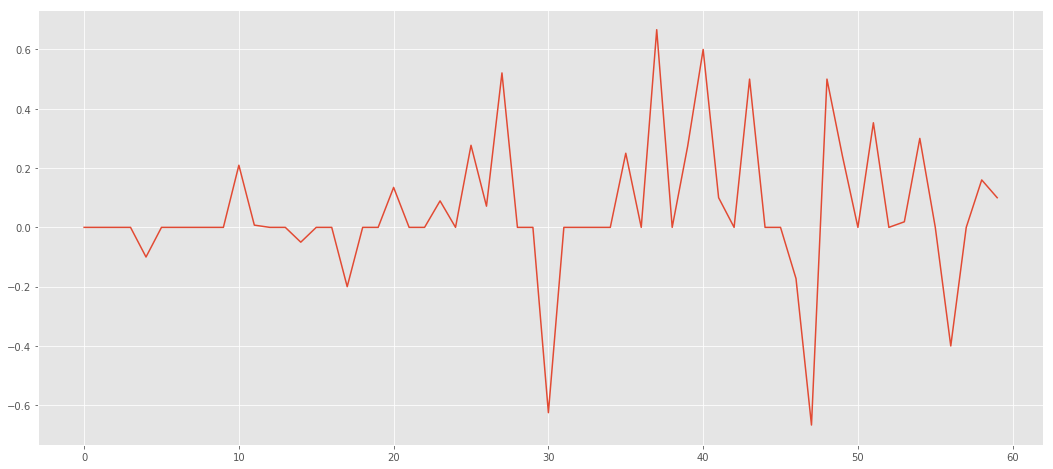

In [21]:
## Austen sentiment values for first 60 sentences

plt.figure(figsize=(18,8))
plt.plot(austen_sentiments[:60])

In [22]:
austen_blob.sentences[30]

Sentence(""My dear Mr. Bennet," replied his wife, "how can you be so tiresome!")

In [23]:
austen_blob.sentences[37]

Sentence("You and the girls may go, or you may send them by themselves, which perhaps will be still better, for as you are as handsome as any of them, Mr. Bingley might like you the best of the party."")

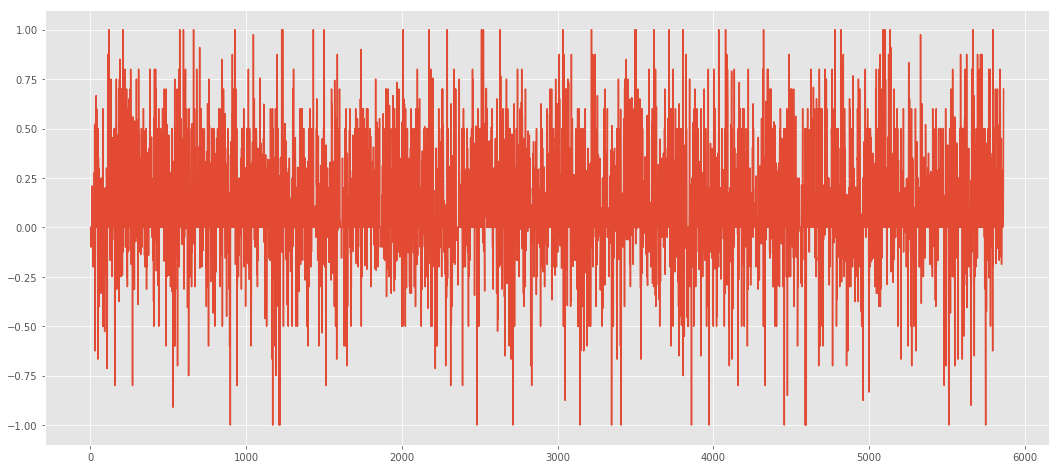

In [24]:
## Plotting 'Pride and Prejudice' sentence sentiment values over full novel

plt.figure(figsize=(18,8))

plt.plot(austen_sentiments)

plt.show()

In [25]:
## Finding the most 'positive' sentences in 'Pride and Prejudice' and printing them

max_sentiment = max(austen_sentiments)

print(max_sentiment) # max sentiment polarity value
print()

for sentence in austen_blob.sentences:
    if sentence.sentiment.polarity == max_sentiment:
        print(sentence)
        print()

1.0

"What an excellent father you have, girls," said she, when the door was shut.

He walked here, and he walked there, fancying himself so very great!

Elizabeth assured him that she could suit herself perfectly with those in the room.

Her performance on the piano-forte is exquisite."

yes--I understand you perfectly."

"I am perfectly convinced by it that Mr. Darcy has no defect.

"It _is_ wonderful,"--replied Wickham,--"for almost all his actions may be traced to pride;--and pride has often been his best friend.

Family pride, and _filial_ pride, for he is very proud of what his father was, have done this.

How wonderfully these sort of things occur!

She owed her greatest relief to her friend Miss Lucas, who often joined them, and good-naturedly engaged Mr. Collins's conversation to herself.

"An excellent consolation in its way," said Elizabeth, "but it will not do for _us_.

The improvement of spending a night in London was added in time, and the plan became perfect as plan cou

In [26]:
## Finding the most 'negative' sentences in 'Pride and Prejudice' and printing them

min_sentiment = min(austen_sentiments)

print(min_sentiment) # max sentiment polarity value
print()

for sentence in austen_blob.sentences:
    if sentence.sentiment.polarity == min_sentiment:
        print(sentence)
        print()

-1.0

shocking!"

Every body is disgusted with his pride.

"But what," said she, after a pause, "can have been his motive?--what can have induced him to behave so cruelly?"

His disposition must be dreadful."

"You shall hear then--but prepare yourself for something very dreadful.

The pause was to Elizabeth's feelings dreadful.

"Wickham so very bad!

The separation between her and her family was rather noisy than pathetic.

It would be dreadful!

It is every way horrible!"

"Oh, yes!--that, that is the worst of all.

"She is so fond of Mrs. Forster," said she, "it will be quite shocking to send her away!

It was all      over before I arrived; so my curiosity was not so dreadfully racked      as _your's_ seems to have been.

He called it, therefore, his duty to step      forward, and endeavour to remedy an evil, which had been brought on      by himself.

"Hate you!

You were disgusted with the women who were always speaking and looking, and thinking for _your_ approbation alone.



In [27]:
## Example: smoothing a list of numbers using the 'pandas' package

some_values = [5, 4, 5, 6, 6, 7, 6, 19, 4, 4, 3, 3, 3, 1, 5, 5, 6, 7, 0]

pandas_series = pd.Series(some_values)

list(pandas_series.rolling(window=4).mean())

[nan,
 nan,
 nan,
 5.0,
 5.25,
 6.0,
 6.25,
 9.5,
 9.0,
 8.25,
 7.5,
 3.5,
 3.25,
 2.5,
 3.0,
 3.5,
 4.25,
 5.75,
 4.5]

In [28]:
## Smoothing our data before plotting

austen_sentiments_pd = pd.Series(austen_sentiments)

austen_sentiments_smooth = austen_sentiments_pd.rolling(window=200).mean()

print(austen_sentiments_smooth[190:220])

190         NaN
191         NaN
192         NaN
193         NaN
194         NaN
195         NaN
196         NaN
197         NaN
198         NaN
199    0.081394
200    0.084519
201    0.088019
202    0.090519
203    0.090519
204    0.091019
205    0.089811
206    0.091477
207    0.092477
208    0.097477
209    0.096852
210    0.095805
211    0.095767
212    0.095767
213    0.096417
214    0.098784
215    0.099784
216    0.100284
217    0.101934
218    0.101934
219    0.101934
dtype: float64


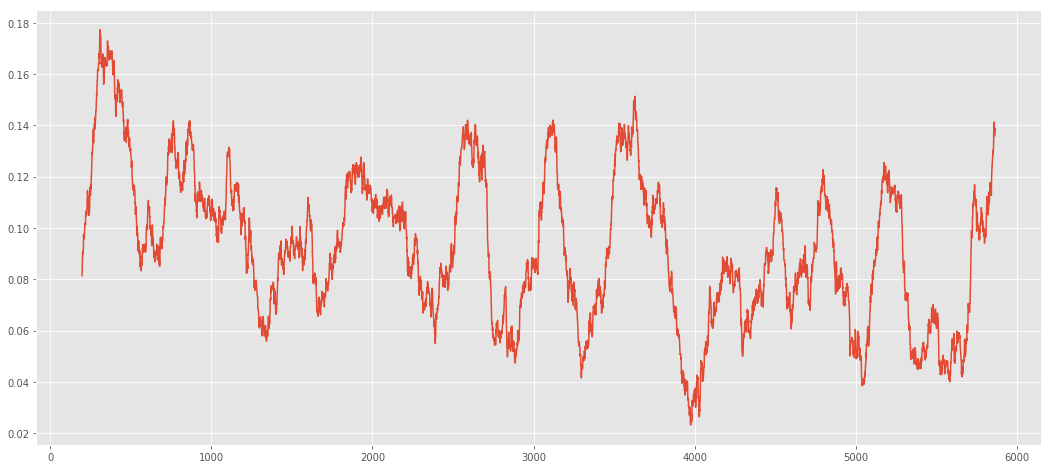

In [29]:
## Plotting smoothed sentiment polarity values for each sentence in 'Pride and Prejudice'

plt.figure(figsize=(18,8))

plt.plot(austen_sentiments_smooth)

plt.show()

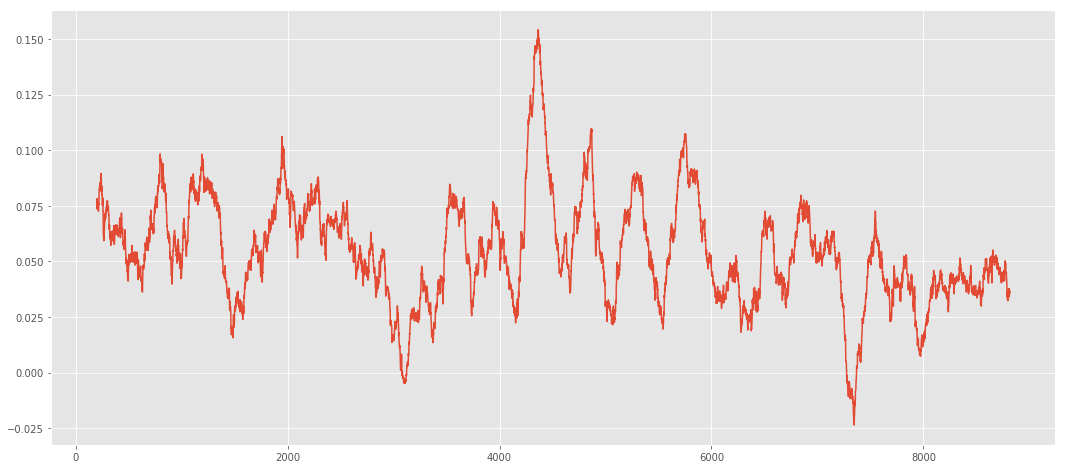

In [30]:
## Comparing 'Moby Dick' sentiment values

melville_sentiments = [item.sentiment.polarity for item in melville_blob.sentences]

melville_sentiments_pd = pd.Series(melville_sentiments)

melville_sentiments_smooth = melville_sentiments_pd.rolling(window=200).mean()

plt.figure(figsize=(18,8))

plt.plot(melville_sentiments_smooth)

plt.show()

In [31]:
## Finding and printing the most 'negative' sentence in a list of smoothed sentiment values

min_sentiment = min(melville_sentiments_smooth[199:])

print(min_sentiment) # min sentiment polarity value
print()

min_sentiment_index = list(melville_sentiments_smooth).index(min_sentiment) # index position of the 'min_sentiment' value

print(melville_blob.sentences[min_sentiment_index])

-0.02351207675426426

But, away with child’s play; no more gaffs and pikes to-day.


In [32]:
## Finding and printing the most 'positive' sentence in a list of smoothed sentiment values

max_sentiment = max(melville_sentiments_smooth[199:])

print(max_sentiment) # max sentiment polarity value
print()

max_sentiment_index = list(melville_sentiments_smooth).index(max_sentiment) # index position of the 'min_sentiment' value

print(melville_blob.sentences[max_sentiment_index])

0.15415500225468964

For as this appalling ocean surrounds the verdant land, so in the soul of man there lies one insular Tahiti, full of peace and joy, but encompassed by all the horrors of the half known life.


In [33]:
## Finding and printing the most 'positive' sentence in a list of smoothed sentiment values

max_sentiment = max(austen_sentiments_smooth[199:])

print(max_sentiment) # max sentiment polarity value
print()

max_sentiment_index = list(austen_sentiments_smooth).index(max_sentiment) # index position of the 'max_sentiment' value

print(austen_blob.sentences[max_sentiment_index])

0.17729830221861462

"If I were as rich as Mr. Darcy," cried a young Lucas who came with his sisters, "I should not care how proud I was.


In [34]:
## Finding and printing the most 'negative' sentence in a list of smoothed sentiment values

min_sentiment = min(austen_sentiments_smooth[199:])

print(min_sentiment) # min sentiment polarity value
print()

min_sent_index=list(austen_sentiments_smooth).index(min_sentiment) # index position of the 'min_sentiment' value

print(austen_blob.sentences[min_sent_index])

0.023184986020923483

And when I returned home, the ----shire was to leave Meryton in a week or fortnight's time.


In [35]:
## Creating functions to expedite the steps we put together above process
# This function accepts an optional second argument for smoothing window size. The default is 200 windows.

def plot_polarity(text_path, window=200):
    text_in = open(text_path).read().replace('\n', ' ')
    blob = TextBlob(text_in)
    sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
    sentiments_pd = pd.Series(sentiments)
    sentiments_smooth = sentiments_pd.rolling(window).mean()
    plt.figure(figsize = (18,8))
    plt.plot(sentiments_smooth)
    plt.show()

In [36]:
!find ./

./
./Australian_Broadcasting_Commission_2006
./Australian_Broadcasting_Commission_2006/rural.txt
./Australian_Broadcasting_Commission_2006/science.txt
./George_Eliot
./George_Eliot/Adam_Bede.txt
./George_Eliot/Daniel_Deronda.txt
./George_Eliot/Felix_Holt_the_Radical.txt
./George_Eliot/Middlemarch.txt
./George_Eliot/Romola.txt
./George_Eliot/Silas_Marner.txt
./George_Eliot/The_Mill_on_the_Floss.txt
./Herman_Melville
./Herman_Melville/Bartleby_The_Scrivener.txt
./Herman_Melville/Battle-Pieces_and_Aspects_of_the_War.txt
./Herman_Melville/Billy_Budd.txt
./Herman_Melville/Israel_Potter.txt
./Herman_Melville/Mardi_vol_1.txt
./Herman_Melville/Mardi_vol_2.txt
./Herman_Melville/Moby_Dick.txt
./Herman_Melville/Omoo_Adventures_in_the_South_Seas.txt
./Herman_Melville/Pierre_or_the_Ambiguities.txt
./Herman_Melville/Redburn_His_First_Voyage.txt
./Herman_Melville/The_Confidence-Man.txt
./Herman_Melville/Typee.txt
./Herman_Melville/White_Jacket.txt
./Inaugural_Speeches
./Inaugural_Speeches/01_washingt

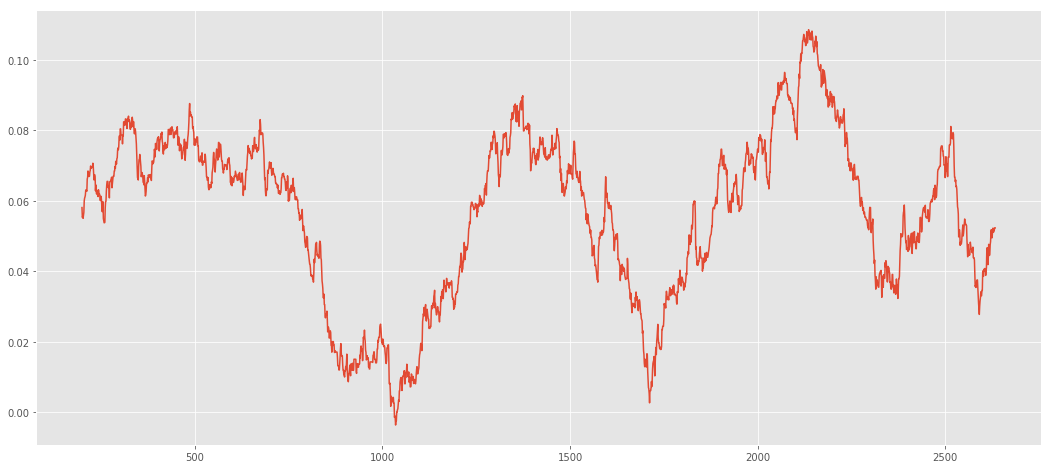

In [37]:
plot_polarity('George_Eliot/Silas_Marner.txt')

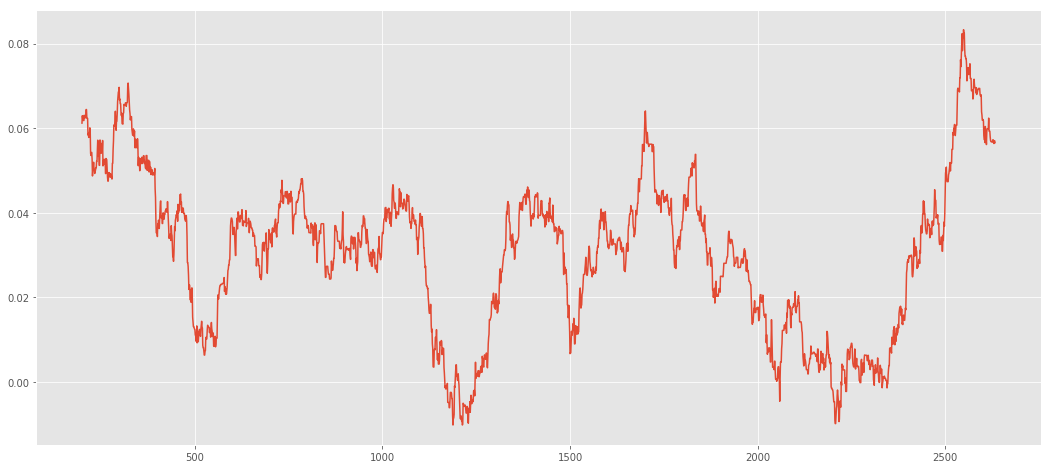

In [38]:
plot_polarity('Joseph_Conrad/Heart_of_Darkness.txt')

### ▷ Plotting smoothed random data (for comparison)

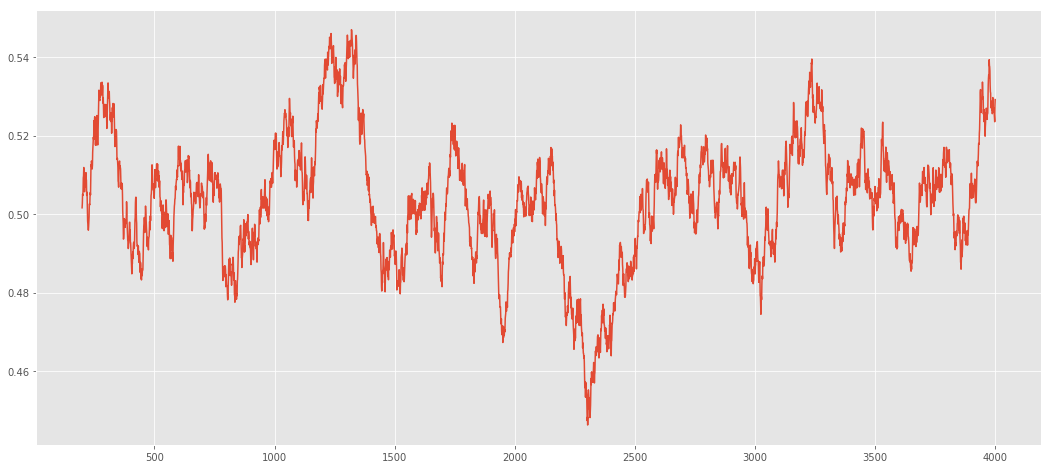

In [39]:
## Plotting completely random data

random_vals = np.random.rand(4000)

vals_pd = pd.Series(random_vals)
vals_smooth = vals_pd.rolling(window=200).mean()

plt.figure(figsize=(18,8))
plt.plot(vals_smooth)

### ▷ Working with multiple files

In [40]:
!ls *

Australian_Broadcasting_Commission_2006:
rural.txt  science.txt

George_Eliot:
Adam_Bede.txt		    Middlemarch.txt   The_Mill_on_the_Floss.txt
Daniel_Deronda.txt	    Romola.txt
Felix_Holt_the_Radical.txt  Silas_Marner.txt

Herman_Melville:
Bartleby_The_Scrivener.txt		  Omoo_Adventures_in_the_South_Seas.txt
Battle-Pieces_and_Aspects_of_the_War.txt  Pierre_or_the_Ambiguities.txt
Billy_Budd.txt				  Redburn_His_First_Voyage.txt
Israel_Potter.txt			  The_Confidence-Man.txt
Mardi_vol_1.txt				  Typee.txt
Mardi_vol_2.txt				  White_Jacket.txt
Moby_Dick.txt

Inaugural_Speeches:
01_washington_1789.txt	       30_roosevelt_theodore_1905.txt
02_washington_1793.txt	       31_taft_1909.txt
03_adams_john_1797.txt	       32_wilson_1913.txt
04_jefferson_1801.txt	       33_wilson_1917.txt
05_jefferson_1805.txt	       34_harding_1921.txt
06_madison_1809.txt	       35_coolidge_1925.txt
07_madison_1813.txt	       36_hoover_1929.txt
08_monroe_1817.txt	       37_roosevelt_franklin_1933.txt
09_monroe_1821.txt

In [41]:
os.chdir('/sharedfolder/Sample_corpora/Inaugural_Speeches/')
sorted(os.listdir('./'))

['01_washington_1789.txt',
 '02_washington_1793.txt',
 '03_adams_john_1797.txt',
 '04_jefferson_1801.txt',
 '05_jefferson_1805.txt',
 '06_madison_1809.txt',
 '07_madison_1813.txt',
 '08_monroe_1817.txt',
 '09_monroe_1821.txt',
 '10_adams_john_quincy_1825.txt',
 '11_jackson_1829.txt',
 '12_jackson_1833.txt',
 '13_van_buren_1837.txt',
 '14_harrison_1841.txt',
 '15_polk_1845.txt',
 '16_taylor_1849.txt',
 '17_pierce_1853.txt',
 '18_buchanan_1857.txt',
 '19_lincoln_1861.txt',
 '20_lincoln_1865.txt',
 '21_grant_1869.txt',
 '22_grant_1873.txt',
 '23_hayes_1877.txt',
 '24_garfield_1881.txt',
 '25_cleveland_1885.txt',
 '26_harrison_1889.txt',
 '27_cleveland_1893.txt',
 '28_mckinley_1897.txt',
 '29_mckinley_1901.txt',
 '30_roosevelt_theodore_1905.txt',
 '31_taft_1909.txt',
 '32_wilson_1913.txt',
 '33_wilson_1917.txt',
 '34_harding_1921.txt',
 '35_coolidge_1925.txt',
 '36_hoover_1929.txt',
 '37_roosevelt_franklin_1933.txt',
 '38_roosevelt_franklin_1937.txt',
 '39_roosevelt_franklin_1941.txt',
 '4

In [42]:
inaugural_filenames = sorted(os.listdir('./'))

inaugural_sentiment_values = []

for filename in inaugural_filenames:
    inaugural_text = open(filename).read()
    sentiment_polarity_value = TextBlob(inaugural_text).sentiment.polarity
    inaugural_sentiment_values.append(sentiment_polarity_value)

print(inaugural_sentiment_values)

[0.20409989875715678, 0.012777777777777782, 0.17090914396061452, 0.2354787414965986, 0.12462612618862617, 0.20941158900836318, 0.10505986625667475, 0.24822346940271453, 0.1737455427951296, 0.156065848965849, 0.1161323366555925, 0.1862532299741602, 0.13125812221966077, 0.15028613415191122, 0.1570634720773225, 0.16774426155240107, 0.1477585377585378, 0.18102136525605914, 0.13351624810068521, 0.0783103008103008, 0.2158637873754153, 0.20653868784936744, 0.16554095375523947, 0.1633560806477473, 0.20128613053613048, 0.17756533693709864, 0.13216615560365558, 0.1878832824734463, 0.16857971246860134, 0.14200352504638222, 0.13484039627537392, 0.16225635475635483, 0.20935103586889306, 0.15240879828326176, 0.17769726195042654, 0.14026330711541984, 0.14062265115836545, 0.13257654181567227, 0.14153127917833802, 0.053854723707664885, 0.18481650924832735, 0.1657912518953127, 0.1695810756572346, 0.15433497536945817, 0.20468173801507142, 0.17713651732882504, 0.23694143085911382, 0.20993388079265954, 0.1

In [43]:
## Creating nicely formatted labels for the sentiment values above

inaugural_labels = [item.replace('.txt','').replace('_', ' ').title() for item in inaugural_filenames]

inaugural_labels

['01 Washington 1789',
 '02 Washington 1793',
 '03 Adams John 1797',
 '04 Jefferson 1801',
 '05 Jefferson 1805',
 '06 Madison 1809',
 '07 Madison 1813',
 '08 Monroe 1817',
 '09 Monroe 1821',
 '10 Adams John Quincy 1825',
 '11 Jackson 1829',
 '12 Jackson 1833',
 '13 Van Buren 1837',
 '14 Harrison 1841',
 '15 Polk 1845',
 '16 Taylor 1849',
 '17 Pierce 1853',
 '18 Buchanan 1857',
 '19 Lincoln 1861',
 '20 Lincoln 1865',
 '21 Grant 1869',
 '22 Grant 1873',
 '23 Hayes 1877',
 '24 Garfield 1881',
 '25 Cleveland 1885',
 '26 Harrison 1889',
 '27 Cleveland 1893',
 '28 Mckinley 1897',
 '29 Mckinley 1901',
 '30 Roosevelt Theodore 1905',
 '31 Taft 1909',
 '32 Wilson 1913',
 '33 Wilson 1917',
 '34 Harding 1921',
 '35 Coolidge 1925',
 '36 Hoover 1929',
 '37 Roosevelt Franklin 1933',
 '38 Roosevelt Franklin 1937',
 '39 Roosevelt Franklin 1941',
 '40 Roosevelt Franklin 1945',
 '41 Truman 1949',
 '42 Eisenhower 1953',
 '43 Eisenhower 1957',
 '44 Kennedy 1961',
 '45 Johnson 1965',
 '46 Nixon 1969',
 '47 

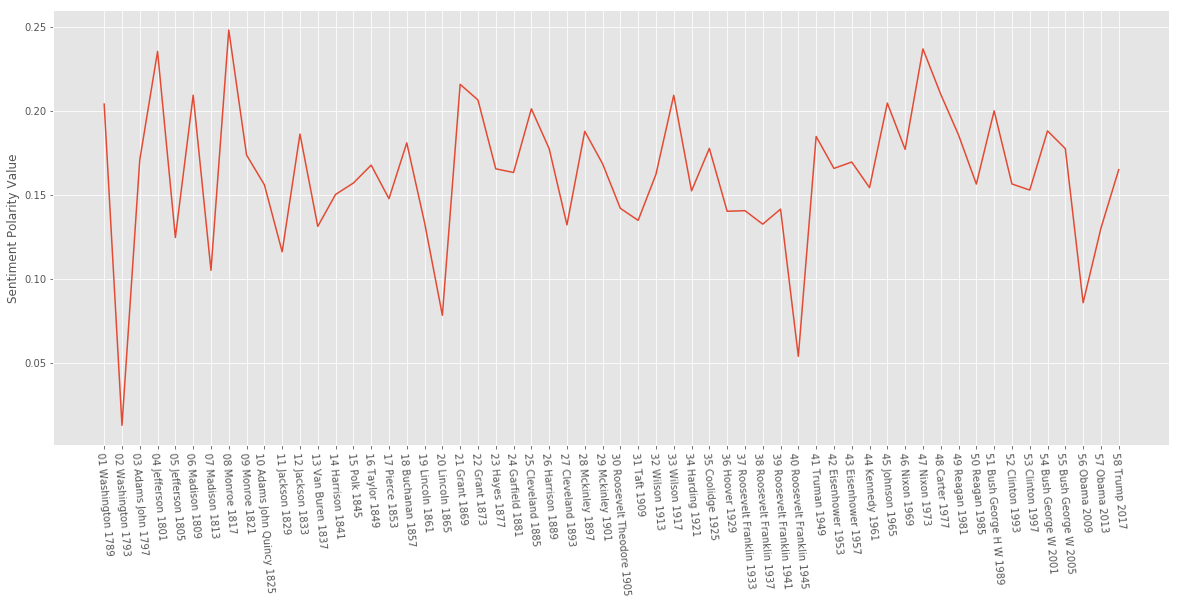

In [44]:
## Plotting presidential inaugural address sentiment values over time

plt.figure(figsize = (20,8))

plt.xticks(range(len(inaugural_sentiment_values)), inaugural_labels)  # two arguments: tick positions, tick display list

plt.xticks(rotation=-85)

plt.ylabel('Sentiment Polarity Value')

plt.plot(inaugural_sentiment_values)

plt.show()

## ▷ Assignment

    For each author in our set of corpora, which is their most 'positive' novel? Their most 'negative'?

## ▷ Sentiment Histograms

In [45]:
os.chdir('/sharedfolder/Sample_corpora/')

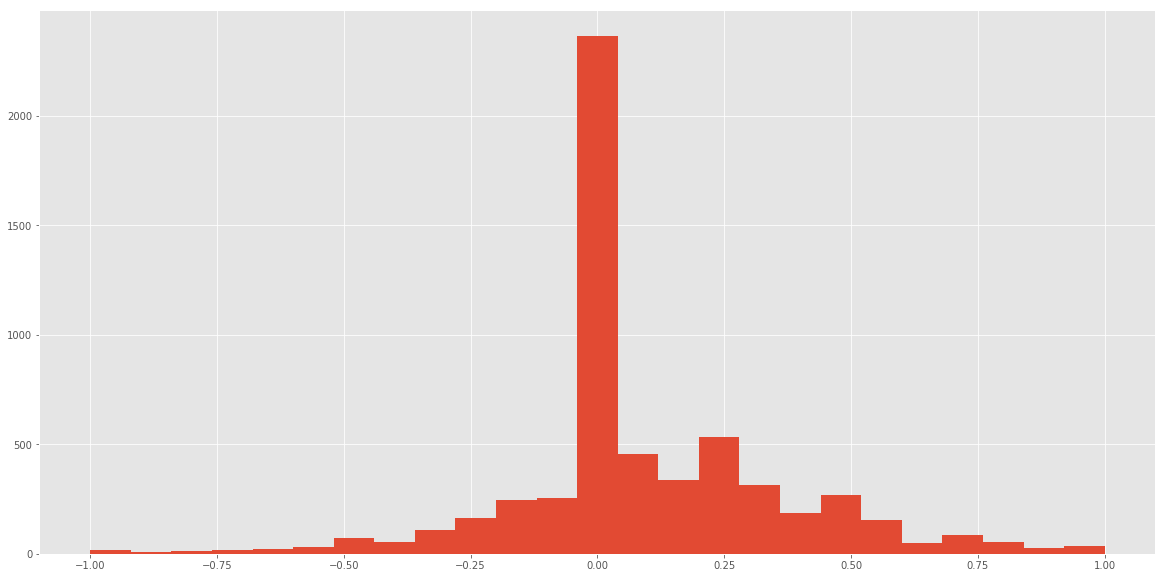

In [46]:
text_in = open('Jane_Austen/Pride_and_Prejudice.txt').read().replace('\n', ' ')

blob = TextBlob(text_in)
sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
plt.figure(figsize=(20,10))
plt.hist(sentiments, bins=25)
plt.show()

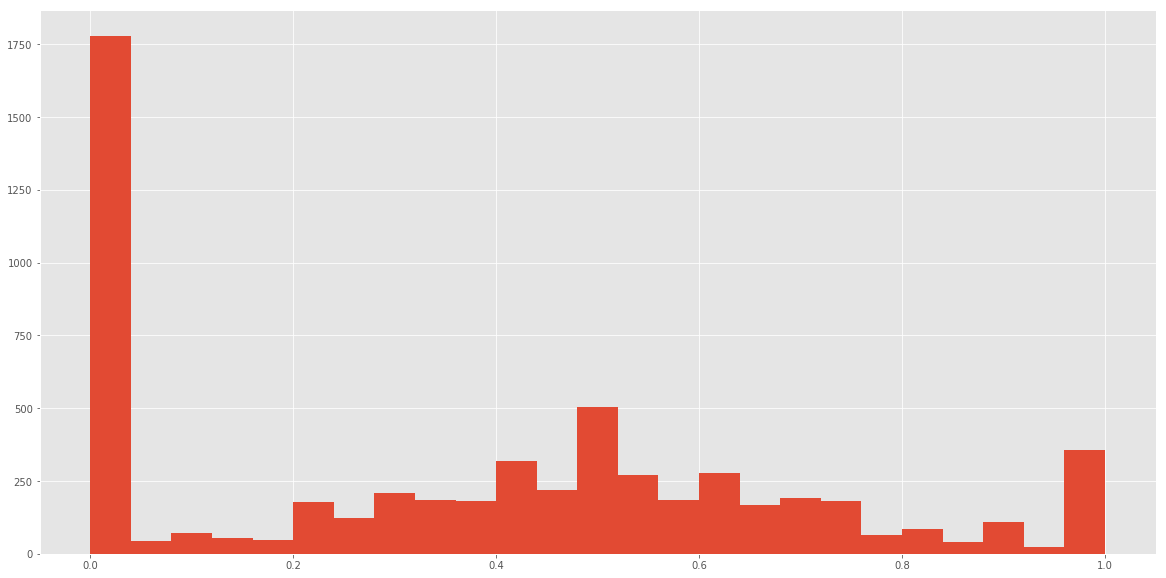

In [47]:
text_in = open('Jane_Austen/Pride_and_Prejudice.txt').read().replace('\n', ' ')

blob = TextBlob(text_in)
sentiments = [sentence.sentiment.subjectivity for sentence in blob.sentences]
plt.figure(figsize=(20,10))
plt.hist(sentiments, bins=25)
plt.show()

## ▷ Cleaning sentiment values

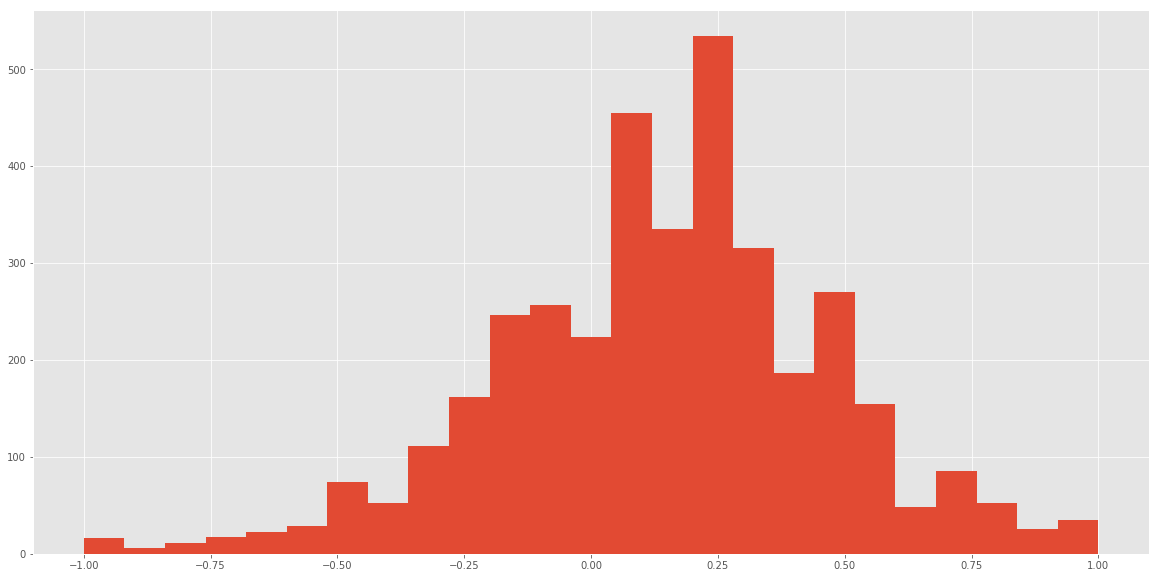

In [48]:
text_in = open('Jane_Austen/Pride_and_Prejudice.txt').read().replace('\n', ' ')

blob = TextBlob(text_in)
sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
sentiments_cleaned = [value for value in sentiments if value!=0]
plt.figure(figsize=(20,10))
plt.hist(sentiments_cleaned, bins=25)
plt.show()

In [49]:
def polarity_histogram_cleaned(text_path):
    text_in = open(text_path).read().replace('\n', ' ')
    blob = TextBlob(text_in)
    sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
    sentiments_cleaned = [value for value in sentiments if value!=0]
    plt.figure(figsize=(20,10))
    plt.hist(sentiments_cleaned, bins=25)
    plt.show()

In [50]:
!find ./

./
./Australian_Broadcasting_Commission_2006
./Australian_Broadcasting_Commission_2006/rural.txt
./Australian_Broadcasting_Commission_2006/science.txt
./George_Eliot
./George_Eliot/Adam_Bede.txt
./George_Eliot/Daniel_Deronda.txt
./George_Eliot/Felix_Holt_the_Radical.txt
./George_Eliot/Middlemarch.txt
./George_Eliot/Romola.txt
./George_Eliot/Silas_Marner.txt
./George_Eliot/The_Mill_on_the_Floss.txt
./Herman_Melville
./Herman_Melville/Bartleby_The_Scrivener.txt
./Herman_Melville/Battle-Pieces_and_Aspects_of_the_War.txt
./Herman_Melville/Billy_Budd.txt
./Herman_Melville/Israel_Potter.txt
./Herman_Melville/Mardi_vol_1.txt
./Herman_Melville/Mardi_vol_2.txt
./Herman_Melville/Moby_Dick.txt
./Herman_Melville/Omoo_Adventures_in_the_South_Seas.txt
./Herman_Melville/Pierre_or_the_Ambiguities.txt
./Herman_Melville/Redburn_His_First_Voyage.txt
./Herman_Melville/The_Confidence-Man.txt
./Herman_Melville/Typee.txt
./Herman_Melville/White_Jacket.txt
./Inaugural_Speeches
./Inaugural_Speeches/01_washingt

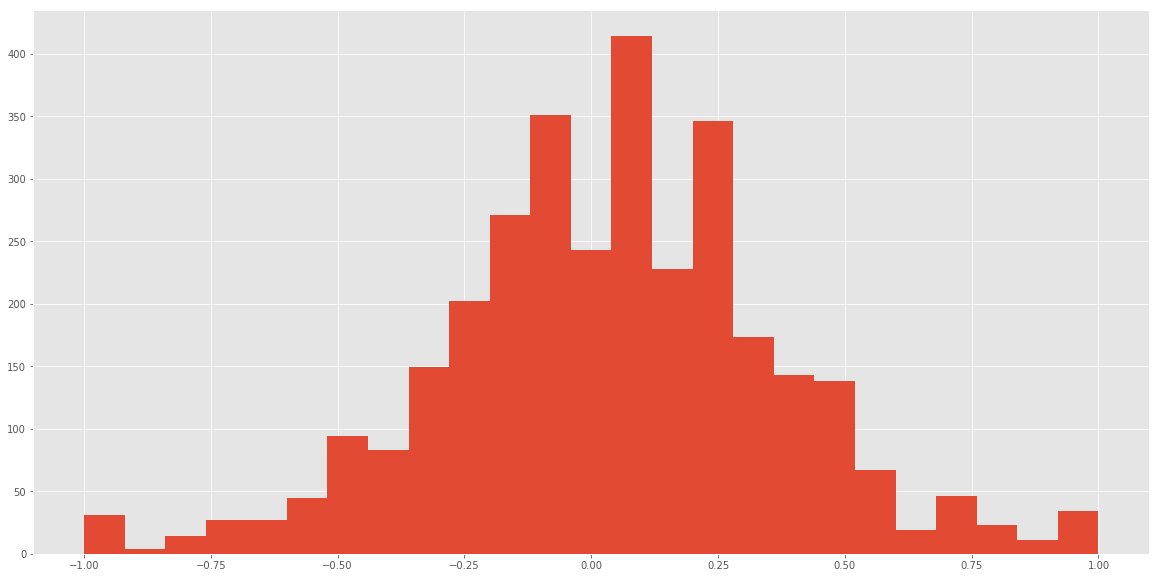

In [51]:
polarity_histogram_cleaned('./Joseph_Conrad/The_Secret_Agent.txt')

## ▷ Comparing Sentiment Distributions

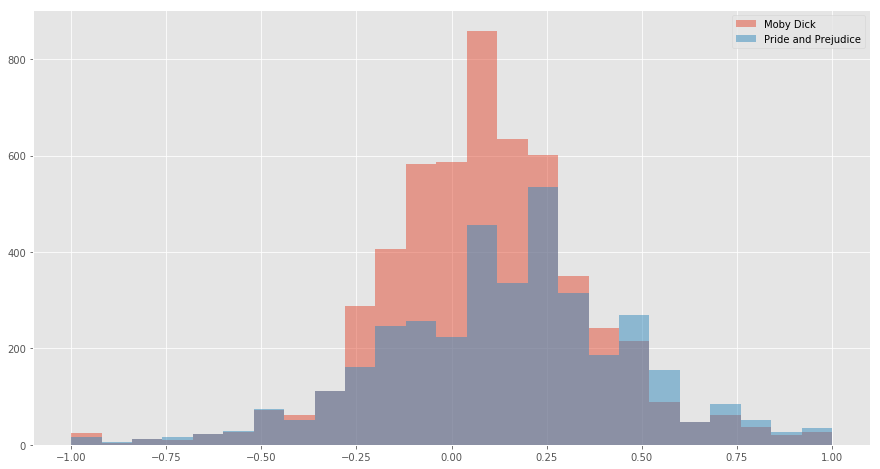

In [52]:
melville_blob = TextBlob(open('Herman_Melville/Moby_Dick.txt').read().replace('\n', ' '))
austen_blob = TextBlob(open('Jane_Austen/Pride_and_Prejudice.txt').read().replace('\n', ' '))

melville_sentiments = [sentence.sentiment.polarity for sentence in melville_blob.sentences]
melville_sentiments_cleaned = [value for value in melville_sentiments if value!=0.0]

austen_sentiments = [sentence.sentiment.polarity for sentence in austen_blob.sentences]
austen_sentiments_cleaned = [value for value in austen_sentiments if value!=0.0]

plt.figure(figsize=(15,8))

plt.hist(melville_sentiments_cleaned, bins=25, alpha=0.5, label='Moby Dick')
plt.hist(austen_sentiments_cleaned, bins=25, alpha=0.5, label='Pride and Prejudice')

plt.legend(loc='upper right')

plt.show()

In [53]:
print(np.mean(melville_sentiments_cleaned))
print(np.mean(austen_sentiments_cleaned))

0.08884905868988113
0.14563039480445292


## ▷ Statistical Tests

In [54]:
## t-test of independent values
# (used to determine whether two *normally distributed* sets of values are significantly different)

from scipy import stats

stats.ttest_ind(melville_sentiments_cleaned, austen_sentiments_cleaned)

Ttest_indResult(statistic=-8.931617460113516, pvalue=5.015589368976402e-19)

In [55]:
## Mann-Whitney U test
# (used to test two sets of *non-normally distributed* values are significantly different)

stats.mannwhitneyu(melville_sentiments, austen_sentiments)

MannwhitneyuResult(statistic=23632750.5, pvalue=6.470759300965543e-20)

## ▷ Assignment

    Is George Eliot significantly more subjective than Jane Austen?
    Is Herman Melville significantly more 'positive' than Joseph Conrad?

## ▷ Assignment

    Write a function that takes two texts' paths as arguments and 
    (a) plots a histogram comparing their sentences' sentiment distributions
    (b) tests whether their sentiment values are significantly different